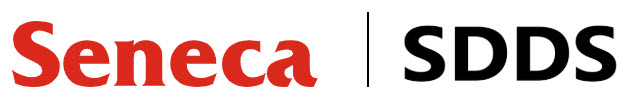

# **Introduction to Data Mining**
## **Assignment2**

## Build and Implement K-means Clustering Algorithm

### What Is Clustering?

Clustering is a set of techniques used to partition data into groups or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. In practice, clustering helps identify two qualities of data:
- Meaningfulness: Meaningful clusters expand domain knowledge. For example, researchers applied clustering to gene expression experiments in the medical field. The clustering results identified groups of patients who respond differently to medical treatments.
- Usefulness: Useful clusters, on the other hand, serve as an intermediate step in a data pipeline. For example, businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can use to create targeted advertising campaigns.

There are many other applications of clustering, such as document clustering and social network analysis. These applications are relevant in nearly every industry, making clustering a valuable skill for professionals working with data in any field.




In [ ]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import pairwise
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook

In [ ]:
# Use %config InlineBackend.figure_format = 'retina'
# after %matplotlib inline to render higher resolution images
%config InlineBackend.figure_format = 'retina'

In [ ]:
# If you wish to use Google colab, the following code will allow you to mount your Google Drive. Otherwise, comment on the following lines.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# To print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


# Import dataset

In [ ]:
#Reading the data from google drive
data=pd.read_csv('gdrive/My Drive/a2data/sessions.csv')
#Print that data imported successfully
print("Data imported successfully")




Data imported successfully


# View top 10 rows of dataset

In [ ]:
#Write your code here
print (data.head(10))


   Home  Products  Search  Prod_A  Prod_B  Prod_C  Cart  Purchase
0     1         0       0       0       0       0     0         0
1     1         1       1       0       0       0     1         0
2     1         0       0       0       0       0     0         0
3     1         1       1       1       0       0     1         1
4     1         0       1       1       1       0     1         1
5     1         1       1       0       1       0     0         0
6     1         0       1       0       0       0     1         1
7     1         0       1       0       1       0     0         0
8     1         1       1       0       1       0     1         0
9     1         0       1       1       1       1     1         1


# Exploratory data analysis

# View summary of Training dataset

In [ ]:
#Write your code here
data.describe()



,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase
count,100.000000,100.000000,100.00000,100.000000,100.00,100.00,100.000000,100.000000
mean,0.600000,0.720000,0.43000,0.530000,0.55,0.45,0.610000,0.390000
std,0.492366,0.451261,0.49757,0.501614,0.50,0.50,0.490207,0.490207
min,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000
50%,1.000000,1.000000,0.00000,1.000000,1.00,0.00,1.000000,0.000000
75%,1.000000,1.000000,1.00000,1.000000,1.00,1.00,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.00,1.00,1.000000,1.000000


**Step8**. Implement the  K-means clustering algorithm to cluster these user sessions into segments. Try different clustering runs with various numbers of clusters (e.g., between 2 and 15), and select the result set(s) that seem to best answer as many of the following sub-questions as possible

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KMeans(n_clusters=11, random_state=42)

KMeans(n_clusters=12, random_state=42)

KMeans(n_clusters=13, random_state=42)

KMeans(n_clusters=14, random_state=42)

KMeans(n_clusters=15, random_state=42)

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method For Optimal k')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

([<matplotlib.axis.XTick at 0x7b66bd6b7670>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

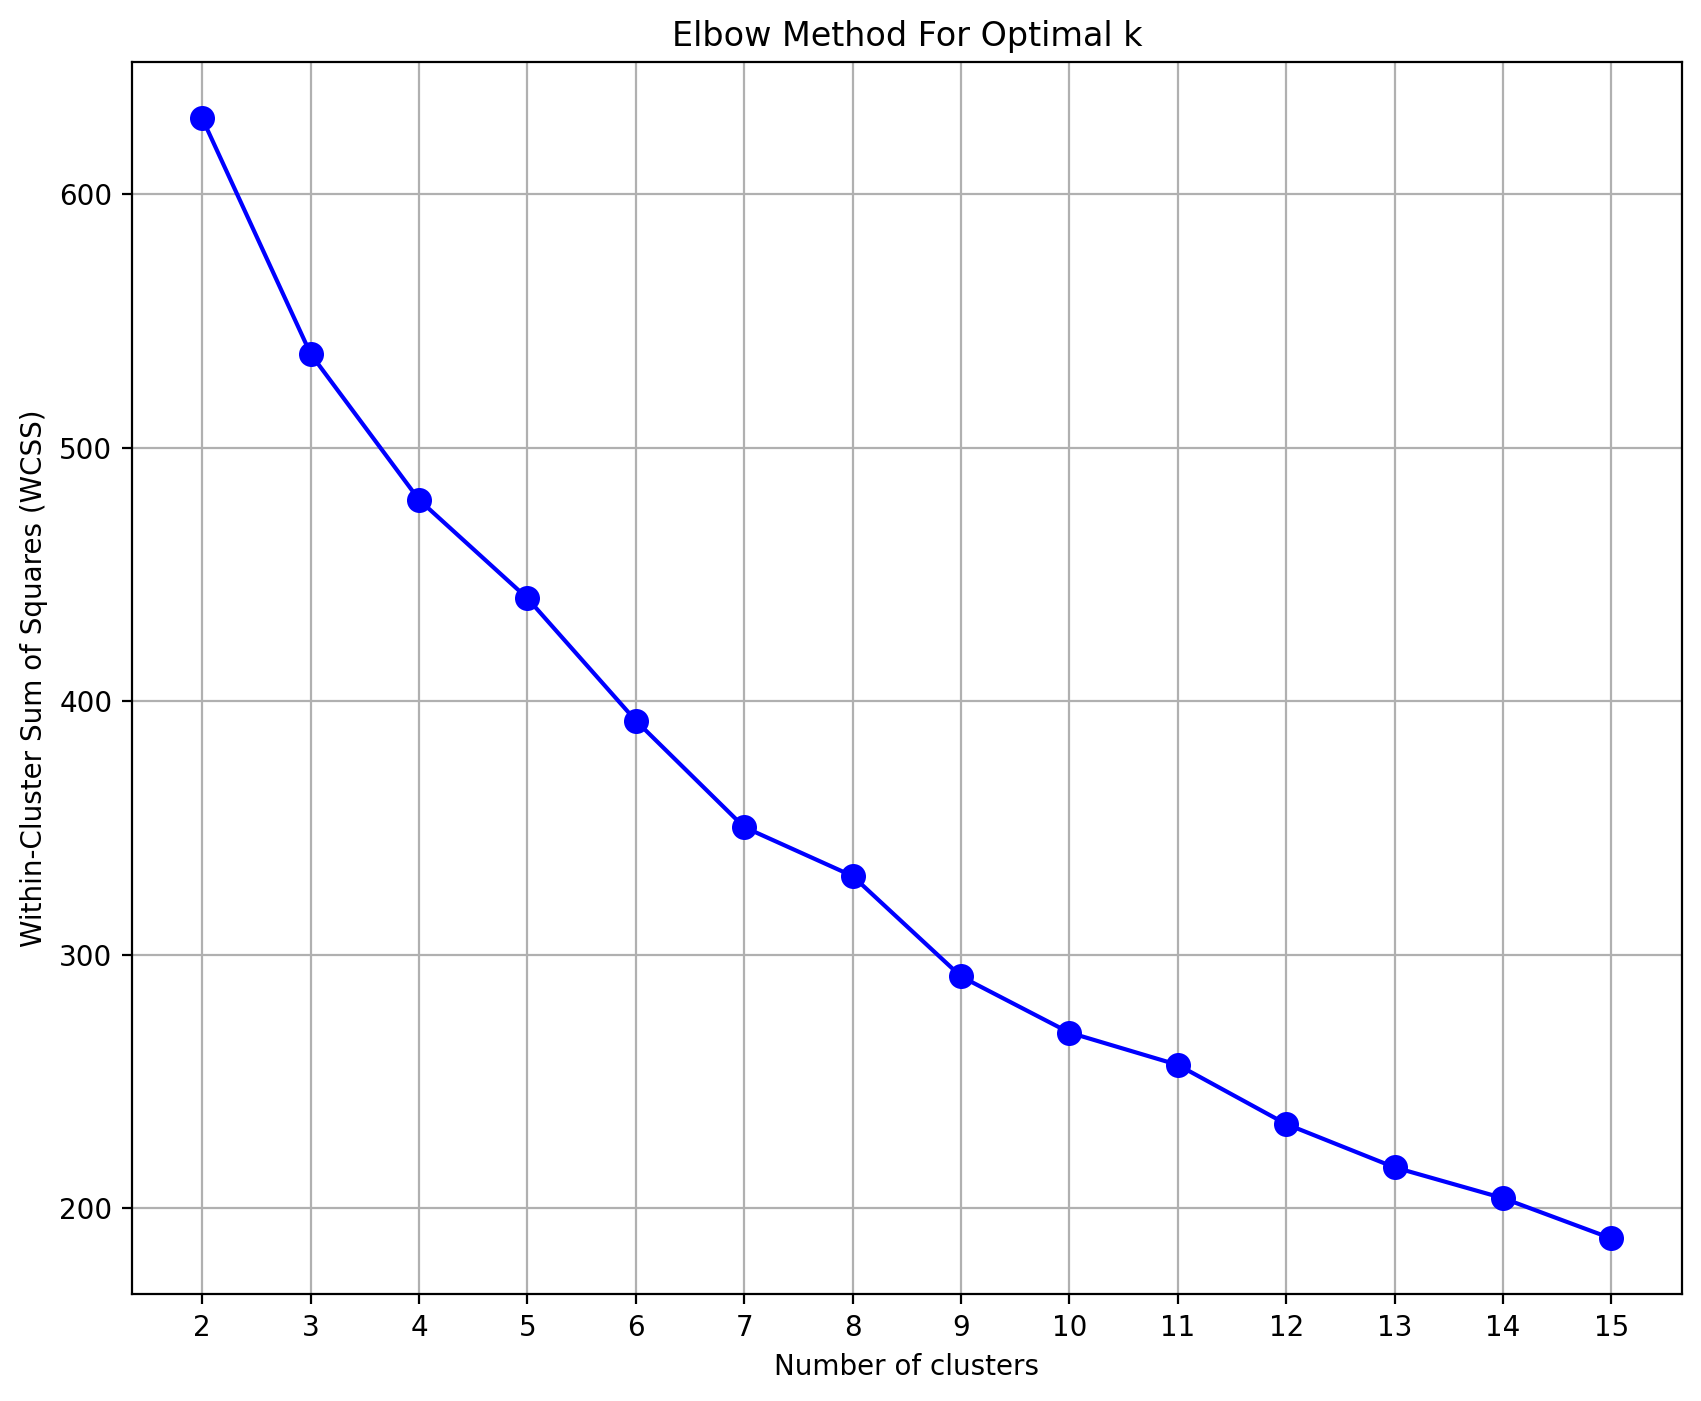

In [ ]:
# Standardize the data
scaler = StandardScaler()
Xz = scaler.fit_transform(data)

# Apply K-means clustering using a range of cluster numbers to find the optimal one with the elbow method
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Xz)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(2, 16), wcss, 'bo-', markersize=8)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()




In [ ]:
#By looking at the graph and using the elbow method the optimal number of clusters for this dataset are k=5. This is where the graph starts to level off and the reduction in within-cluster sum of squares (WCSS) becomes less significant with each additional cluster.
optimal_clusters = 5
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42).fit(Xz)
clusters = kmeans_optimal.labels_

# Describe each cluster
for i in range(optimal_clusters):
    cluster_group = pd.DataFrame(Xz[clusters == i], columns=data.columns)
    print(f"\nCluster {i} description:")
    print(cluster_group.describe())
#SAVING THE CLUSTER ASSIGNMENT TO DATASET
scaler = StandardScaler()
X = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Save the final dataset with cluster assignments
# Replace 'final_dataset.csv' with your desired file name
data.to_csv('gdrive/My Drive/a2data/sessions.csv', index=False)

print(data.head(10))



Cluster 0 description:
            Home      Products     Search     Prod_A     Prod_B     Prod_C  \
count  21.000000  2.100000e+01  21.000000  21.000000  21.000000  21.000000   
mean   -0.641533  6.236096e-01   0.093300  -0.775683   0.808816   0.435516   
std     0.944911  1.137640e-16   1.033713   0.718432   0.438634   0.970959   
min    -1.224745  6.236096e-01  -0.868554  -1.061913  -1.105542  -0.904534   
25%    -1.224745  6.236096e-01  -0.868554  -1.061913   0.904534  -0.904534   
50%    -1.224745  6.236096e-01  -0.868554  -1.061913   0.904534   1.105542   
75%     0.816497  6.236096e-01   1.151339  -1.061913   0.904534   1.105542   
max     0.816497  6.236096e-01   1.151339   0.941697   0.904534   1.105542   

            Cart  Purchase  
count  21.000000  21.00000  
mean   -1.250641  -0.79959  
std     0.000000   0.00000  
min    -1.250641  -0.79959  
25%    -1.250641  -0.79959  
50%    -1.250641  -0.79959  
75%    -1.250641  -0.79959  
max    -1.250641  -0.79959  

Cluster 1 d

**Step9.** If a new user is observed to access the following pages: Home => Search => Prod_B, according to your clusters, what other product should be recommended to this user? What if the new user has accessed the following sequence instead: Products => Prod_C? Explain your answer based on your clustering results.
### >>>>>Answer and Show the result of this step here<<<<<

In [ ]:
#Write your code here
#Answer for Step 9-
# Based on the clustering results obtained from applying the K-means algorithm to user session data, we can deduce recommendations for a new user's journey on the website.
# For a user who follows the path "Home => Search => Prod_B", Cluster 4 is most indicative, as it shows a notable preference for "Prod_B".
# Within this cluster, there is also a positive tendency towards "Prod_C", suggesting that users interested in "Prod_B" may also find "Prod_C" appealing.
# Hence, it would be reasonable to recommend "Prod_C" to this user. Conversely, when a new user navigates through "Products => Prod_C", Cluster 4 again provides valuable insights.
# This cluster exhibits high engagement with both "Products" and "Prod_C", and similarly, a significant interest in "Prod_B".
# This pattern implies that "Prod_B" could be a relevant suggestion for users who show an affinity for "Prod_C". The clustering analysis thus offers a strategic method to enhance user experience by recommending products that align with their demonstrated preferences, potentially increasing the likelihood of purchase.







**Step10.** Can clustering help us identify casual browsers (**"window shoppers"**), focused browsers (those who seem to know what products they are looking for), and searchers (those using the search function to find items they want)? If so, Do any of these groups show a higher or lower propensity to purchase?
### >>>>>Answer and Show the result of this step here<<<<<

In [ ]:
#Write your code here
# Ans for Step 10-
#Utilizing insights from K-means clustering applied to user session data enables the categorization of user behavior into distinct groups.
# Cluster 0 seems to capture casual browsers or "window shoppers," who frequently visit initial pages like "Home" and "Products" but rarely engage with "Cart" or "Purchase," indicating a tendency to browse without immediate intent to purchase.
# In contrast, Cluster 1 aligns with focused browsers, whose navigation patterns suggest a decisive intention to buy, as evidenced by their progression to "Cart" and "Purchase" stages after visiting specific product pages.

#Cluster 2 sheds light on "searchers," characterized by their significant use of the search function, which suggests targeted searching for specific items.
# Despite their high "Search" activity, these users exhibit varied purchasing behavior, with only moderate interactions with "Cart" and "Purchase," possibly indicating they are weighing their options.
# When assessing the propensity to purchase among these groups, the data points to focused browsers—predominantly in Cluster 1—as having the highest likelihood of finalizing a purchase, while casual browsers are least likely to do so.
# This segmentation through clustering not only deepens our understanding of consumer navigational tendencies but also helps in forecasting the likelihood of purchases based on user engagement.









**Step11.** Do any clusters/segments show particular interest in one or more products? If so, can we identify any unique characteristics of their navigational behaviour or their purchase propensity?
### >>>>>Answer and Show the result of this step here<<<<<

In [ ]:
#Write your code here
# Ans for Step 11

# Cluster 1 stands out with its focus on "Prod_A", as evidenced by a substantial average value suggesting a high interest level.
# The positive average values for both "Cart" and "Purchase" imply these users often proceed from interest to actual purchase, hinting at a targeted buying intent when it comes to "Prod_A".

#Conversely, Clusters 3 and 4 exhibit distinct behaviors; Cluster 3 users typically go straight to "Prod_A" and have a notable propensity to buy, while Cluster 4 users show a marked preference for "Prod_B" and "Prod_C", with their interest frequently culminating in a purchase.
# These clusters encapsulate users with specific product interests and a higher likelihood of transaction completion.

# These clusters represent segments of users with clear product interests and varying degrees of purchase intention, which can be leveraged for targeted marketing and user experience optimization.








**Step12.** Suppose we know that, during data collection, independent banner ads were placed on some popular sites pointing to products A and B. Can we identify segments corresponding to visitors that respond to the ads? (note that such users are likely to enter the site by going directly to product pages rather than navigating from the Home page). If so, can we determine if either of these promotional campaigns are having any success?
### >>>>>Answer and Show the result of this step here<<<<<


In [ ]:
#Write your code here
# Ans for Step 12
#From the clustering results, we can infer responses to the banner ads for products A and B by identifying clusters where users often visit these product pages directly. Clusters 3 and 4 are particularly noteworthy as they demonstrate direct engagement with "Prod_A" and "Prod_B", respectively.
#Cluster 3 has a high mean for "Prod_A" and a significant mean for "Purchase", suggesting that the banner ads for Product A are effectively converting interest into sales. Similarly, Cluster 4, with its strong means for both "Prod_B" and "Prod_C" and a high "Purchase" mean, indicates that the ads for Product B are also successful in driving purchases. These patterns suggest that the banner ads for both Product A and Product B have been successful in attracting users who are likely to make a purchase, as indicated by their direct navigation to these product pages and subsequent transactions.








**Note**: For this part, you should submit your clustering result summary (including the cluster centroids), the final data set, which shows the final assignment of these sessions to clusters, and your answers to the above questions, along with your justification based on the clustering results. Also, you should show the cluster visualization to identify interesting distributions of various page visits among and within clusters.

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Cluster Visualization with PCA')

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

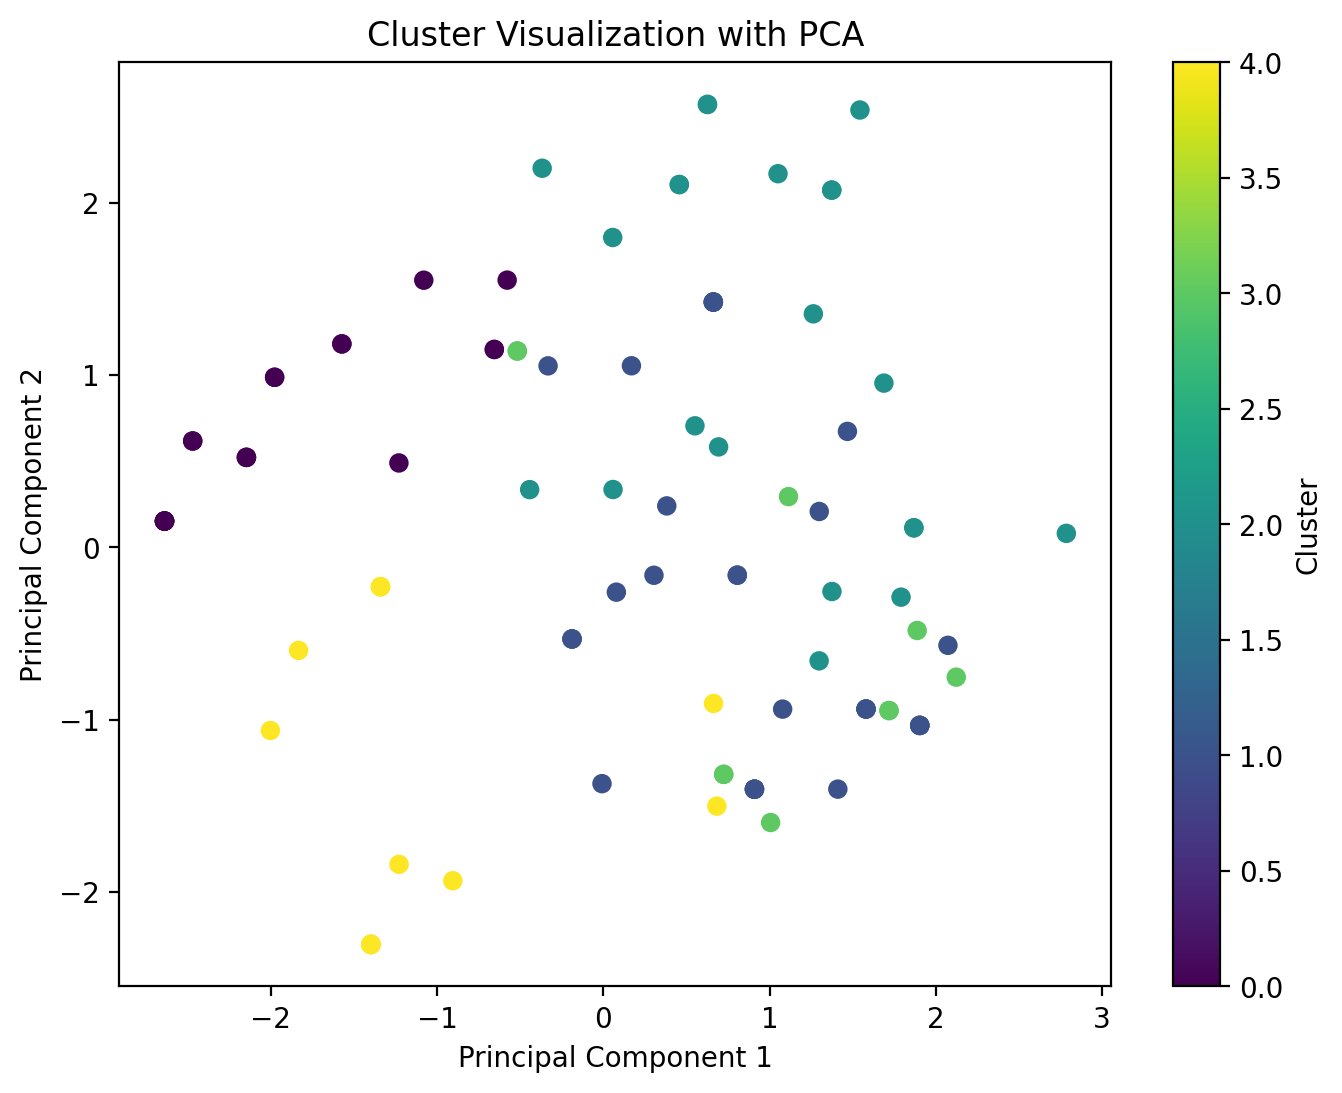

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
